<a href="https://colab.research.google.com/github/ParmisJQ/AI-hub/blob/main/AIhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
!pip install kagglehub # install the package
import kagglehub
import os # import os module for file system operations


crowww_a_large_scale_fish_dataset_path = kagglehub.dataset_download('crowww/a-large-scale-fish-dataset')

data_dir = crowww_a_large_scale_fish_dataset_path  # or os.path.join(os.getcwd(), 'a-large-scale-fish-dataset') for current directory

print('Data source import complete.')
print(f'Dataset downloaded to: {data_dir}')

# List the content of the dataset folder
print(os.listdir(data_dir)) # list the content

100%|██████████| 3.24G/3.24G [02:36<00:00, 22.2MB/s]

Extracting files...


Data source import complete.
Dataset downloaded to: /root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2
['Fish_Dataset', 'README.txt', 'NA_Fish_Dataset', 'Segmentation_example_script.m', 'license.txt']


In [ ]:
# Use the variable from the previous cell that holds the correct download path
data_dir = crowww_a_large_scale_fish_dataset_path
# List the content of the dataset folder
print(os.listdir(data_dir))

['Fish_Dataset', 'README.txt', 'NA_Fish_Dataset', 'Segmentation_example_script.m', 'license.txt']


In [ ]:
import pandas as pd

# Initialize lists to hold image paths and labels
label = []
path = []

# Define the fish dataset directory
fish_dir = data_dir

for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if filename.endswith('.png'):
            if not 'GT' in dir_name:
                label.append(os.path.basename(dir_name))
                path.append(os.path.join(dir_name, filename))

data = pd.DataFrame({'path': path, 'label': label})
print(data.head())

                                                path            label
0  /root/.cache/kagglehub/datasets/crowww/a-large...  Gilt-Head Bream
1  /root/.cache/kagglehub/datasets/crowww/a-large...  Gilt-Head Bream
2  /root/.cache/kagglehub/datasets/crowww/a-large...  Gilt-Head Bream
3  /root/.cache/kagglehub/datasets/crowww/a-large...  Gilt-Head Bream
4  /root/.cache/kagglehub/datasets/crowww/a-large...  Gilt-Head Bream


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_images(df, target_size=(128, 128)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['path'], target_size=target_size)
        img = img_to_array(img) / 255.0  # Normalize the pixel values
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)
X, y = load_images(data)
print(f"Loaded {len(X)} images.")

Loaded 9281 images.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7424, 128, 128, 3)
X_test shape: (1857, 128, 128, 3)
y_train shape: (7424,)
y_test shape: (1857,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (7424, 11)
y_test shape: (1857, 11)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Create a Sequential model
model = Sequential()
model.add(Flatten(input_shape=(128, 128, 3)))  # 128x128 images with 3 channels
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer with softmax for multi-class classification
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      25,166,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,300,491 (96.51 MB)

 Trainable params: 25,300,491 (96.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.1261 - loss: 8.3974 - val_accuracy: 0.2040 - val_loss: 2.2039
Epoch 2/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1695 - loss: 2.2011 - val_accuracy: 0.1818 - val_loss: 2.0935
Epoch 3/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1832 - loss: 2.1012 - val_accuracy: 0.1657 - val_loss: 2.0667
Epoch 4/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1792 - loss: 2.0591 - val_accuracy: 0.1778 - val_loss: 2.0253
Epoch 5/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1769 - loss: 2.0622 - val_accuracy: 0.2081 - val_loss: 1.9724
Epoch 6/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1929 - loss: 2.0309 - val_accuracy: 0.2168 - val_loss: 1.9022
Epoch 7/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1961 - loss: 2.0062 - val_accuracy: 0.2337 - val_loss: 1.8836
Epoch 8/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1948 - loss: 1.9909 - val_acc

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2880 - loss: 1.7735
Test accuracy: 0.28863757848739624


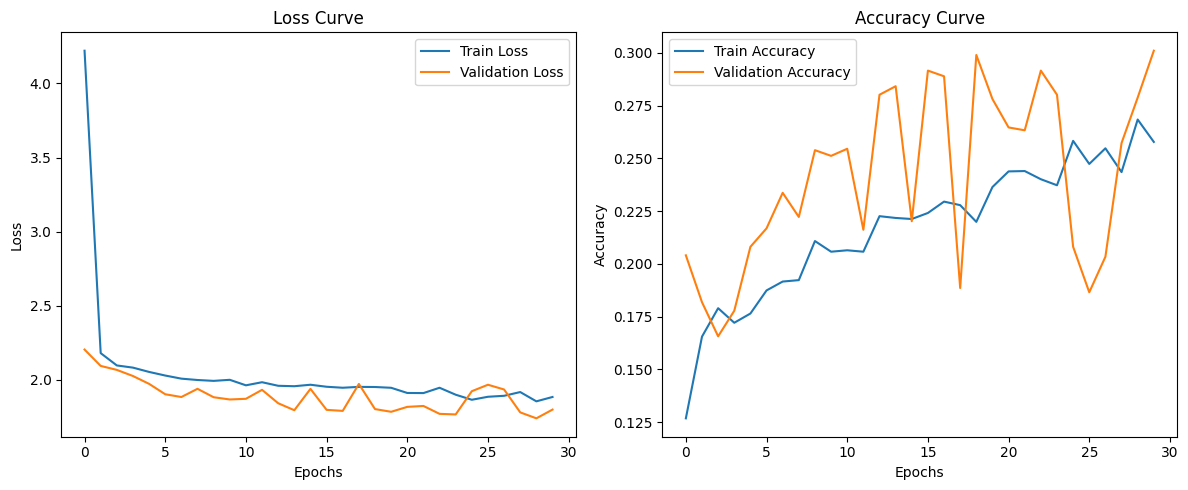

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply it to the training data
datagen.fit(X_train)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

# Build a new model on top of the base
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


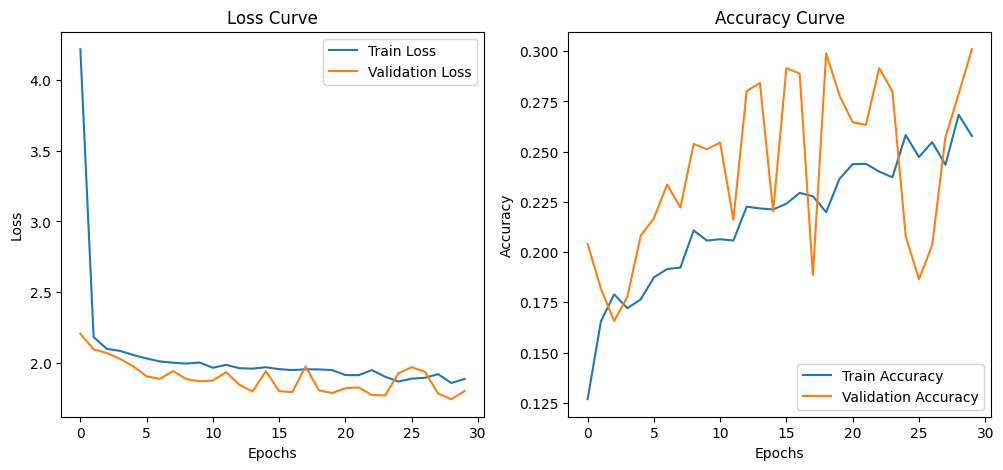

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
# Convert predictions to valid indices in label encoder's class list
valid_predictions = np.clip(y_pred_classes, 0, len(label_encoder.classes_) - 1)

# Inverse transform the clipped predictions
y_pred_labels = label_encoder.inverse_transform(valid_predictions)

print(f"Predictions: {y_pred_labels[:5]}")

Predictions: ['Trout' 'Trout' 'Trout' 'Trout' 'Trout']


# This was my first time trying :(